##### Exploring data

In [2]:
import pandas as pd
import numpy as np

In [3]:
import ast

In [547]:
df = pd.read_csv("../input/hexagonFull.csv",lineterminator='\n',index_col=0) #issue 2 resolved, read as object

In [4]:
df2 = pd.read_csv("../input/hexagonData.csv",lineterminator='\n',index_col=0) #issue 2 resolved, read as object

In [415]:
df2

,friendList,friendsCount,hashtags,imageurl,lang,parentID,retweetCount,retweeted,tweetCreatedAt,tweetId,tweetText,userCreatedAt,userDescription,userFollowersCount,userID,userLocation,userName
favourites_count,,,,,,,,,,,,,,,,,
1,"[878600126780121089, 895294202161930241]",2,"['tobacco', 'juul', 'dip', 'cigs']",http://pbs.twimg.com/profile_images/9314394733...,en,NaN,1,False,2018-01-16 18:19:28,953330878939267073,HAPPY 18th B-Day Devan Sierra!!! It’s YOUR day...,2016-07-03 03:43:12,All tweets about Tobacco,318,749448380263182336,NaN,Tobacco\r
1138,"[1036100582598168576, 98821255, 1447809733, 22...",244,"['sloppy2nds', 'juul', 'getgo']",http://pbs.twimg.com/profile_images/1036006248...,en,NaN,0,False,2017-08-23 00:30:41,900153283326730241,Skokie! Love you man happy birthday!😫❤️🤘🏼 #slo...,2016-03-14 20:35:53,SIHS,319,709478176418881536,NaN,Jack Whelan\r


In [42]:
df.columns

Index(['Unnamed: 0', 'favourites_count', 'friendList', 'friendsCount',
       'hashtags', 'imageurl', 'lang', 'parentID', 'retweetCount', 'retweeted',
       'tweetCreatedAt', 'tweetId', 'tweetText', 'userCreatedAt',
       'userDescription', 'userFollowersCount', 'userID', 'userLocation',
       'userName\r'],
      dtype='object')

#### Splitting the data based on if it has hashtag juul or not

In [43]:
Juul = ['juul','JUUL','Juul']

In [522]:
# check = api.show_friendship(source_id = [749448380263182336],target_id =[895294202161930241])

In [552]:
users = df.userID.tolist()

In [ ]:
import collections
a = [(item,count) for item, count in collections.Counter(users).items() if count > 1]
for ele in a:
    print(ele)

In [551]:
unique_users = len(set(unique_users))

3444

In [561]:
for user in unique_users[:20]:
    status = api.user_timeline(user, tweet_mode= 'extended',count = 20)

In [597]:
if df.empty:
    print ("yesy")

In [602]:
df3 = pd.DataFrame([])
df3.empty

True

In [562]:
status = api.user_timeline(df.userID.iloc[0],count=200,tweet_mode= 'extended')

In [594]:
status[10].retweeted_status._json

{'created_at': 'Sat Sep 22 12:58:02 +0000 2018',
 'id': 1043484565577392128,
 'id_str': '1043484565577392128',
 'full_text': 'Secondhand compliments delivered through another person (such as a parent) is a powerful way to build relationship with students. https://t.co/9N3pkJU1ce',
 'truncated': False,
 'display_text_range': [0, 129],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/9N3pkJU1ce',
    'expanded_url': 'https://twitter.com/Larryferlazzo/status/1043268914161967104',
    'display_url': 'twitter.com/Larryferlazzo/…',
    'indices': [130, 153]}]},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 833033518120857600,
  'id_str': '833033518120857600',
  'name': 'Clay Cook',
  'screen_name': 'ClayCook_p

In [428]:
def counter(df):
    counts = dict()
    counts['Juul'] = 0
    for idx,hashtags in (df.hashtags.iteritems()):
        if (type(hashtags) == str and len(hashtags) != 0):
            hashtags = ast.literal_eval(hashtags)
            if (hashtags != None):
                for hashtag in hashtags:
                    if (hashtag in counts):
                        counts[hashtag] += 1
                    elif (hashtag in Juul):
                        counts['Juul'] += 1
                    else:
                        counts[hashtag] = 1
    return counts

In [25]:
def count_hashtag(df,hashtag):
    df_upd = pd.DataFrame()
    count = 0
    for idx,hashtags in enumerate(df.hashtags):
        if (type(hashtags) == str and len(hashtags) != 0):
            hashtags = ast.literal_eval(hashtags)
            if (hashtags != None):
                if set(hashtag).intersection(set(hashtags)):
                    count += 1
                    df_upd = df_upd.append(df.iloc[idx])
    return(count,df_upd)

In [11]:
def autolabel(rects,ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%d' % int(height),
                ha='center', va='bottom')

In [380]:
import matplotlib.pyplot as plt
def graph(xvalues,yvalues,xlabel='xrange',ylabel='values',title=None,text= None,typeG='Bar'):
    width = 0.5
    fig, ax = plt.subplots()
    if (typeG == 'Bar'):
        p1 = ax.bar(xvalues, yvalues, width, color='#2475bf')            #hex for blue
        rects1 = ax.bar(xvalues, yvalues, width, color='#2475bf')
        autolabel(rects1,ax)
        ax.set_xticklabels(xvalues, rotation=30, fontsize=12,ha='right')    
    elif(typeG =='Line'):
        p1 = ax.plot(xvalues,yvalues,color='#2475bf')
    ax.autoscale_view()
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    if (title is not None):
        plt.title(title)
    if (text is not None):
        plt.text(0.8, 0.9,text, ha='center', va='center', transform=ax.transAxes, fontsize=12)
    plt.show()

In [13]:
counts_all = counter(df)

In [14]:
import operator
sortedList = sorted(counts_all.items(),key = operator.itemgetter(1),reverse = True)

In [139]:
sortedList

[('Juul', 4880),
 ('tattoo', 613),
 ('CaptionThis', 597),
 ('vape', 442),
 ('vaping', 388),
 ('juulvapor', 186),
 ('juulpods', 145),
 ('ecigs', 130),
 ('juulnation', 126),
 ('ecig', 122),
 ('tobacco', 110),
 ('juulgang', 105),
 ('nicotine', 103),
 ('vapelife', 98),
 ('SwitchToJUUL', 94),
 ('smoking', 76),
 ('pods', 75),
 ('cbd', 75),
 ('vapenation', 72),
 ('smoke', 69),
 ('Juuling', 69),
 ('FDA', 67),
 ('vapor', 66),
 ('deals', 65),
 ('vapeshop', 62),
 ('phix', 59),
 ('ecigarettes', 57),
 ('dope', 52),
 ('clouds', 50),
 ('ejuice', 50),
 ('Vape', 49),
 ('vapeporn', 48),
 ('houston', 47),
 ('teens', 46),
 ('goodvibes', 44),
 ('vapefam', 44),
 ('vibes', 44),
 ('juuling', 44),
 ('cigarettes', 43),
 ('vaporizer', 41),
 ('vapelyfe', 39),
 ('JUULpods', 37),
 ('Vaping', 37),
 ('hookah', 35),
 ('health', 35),
 ('coolcucumber', 35),
 ('ecigarette', 34),
 ('mango', 34),
 ('smokeshop', 34),
 ('vapeon', 34),
 ('eonsmoke', 33),
 ('vapers', 31),
 ('eliquid', 30),
 ('bestinhouston', 30),
 ('publicheal

In [44]:
labels = [ele[0] for ele in sortedList]
values = [ele[1] for ele in sortedList]

Occurence of hashtags in all tweets


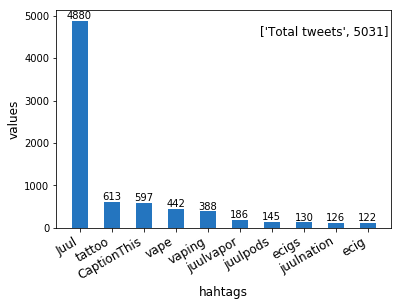

length of dataset =  5031
no of hashtags=  17402


In [16]:
# graph with total no of hashtags(not per tweet)
print("Occurence of hashtags in all tweets")
graph(labels[:10],values[:10],text =['Total tweets',len(df)])
print("length of dataset = ", len(df))
print("no of hashtags= ", sum(counts_all.values()))

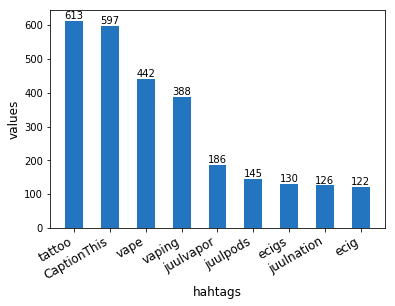

total Dataset 5031
4880
186
126
17402


In [17]:
#occurences of hashtags without juul
graph(labels[1:10],values[1:10])
print('total Dataset',len(df))
print(counts_all['Juul'])
print(counts_all['juulvapor'])
print(counts_all['juulnation'])
print(sum(counts_all.values()))

In [18]:
#graph with specific hashtag per tweet
print("specific hashtag in tweet")
c_juul,_ = count_hashtag(df,Juul)
c_juulvapor,_ = count_hashtag(df,['juulvapor'])
c_juulnation,_ = count_hashtag(df,['juulnation'])
doit4juul = count_hashtag(df,['doit4juul'])
label = ['juul','juulvapor','juulnation']
value = [c_juul,c_juulvapor,c_juulnation]

specific hashtag in tweet


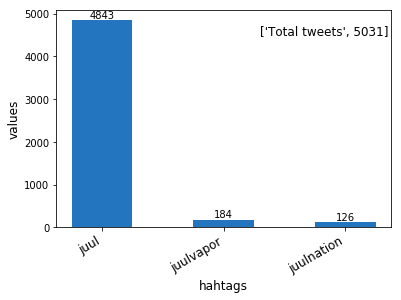

In [22]:
graph(label,value,text=['Total tweets',len(df)])

In [20]:
print(c_juul,c_juulvapor,c_juulnation)

4843 184 126


In [254]:
#getting dataset with specfic hahtags
_,df_Juul = count_hashtag(df,Juul)
_,df_juulvapor = count_hashtag(df,['juulvapor'])
_,df_juulnation = count_hashtag(df,['juulnation'])

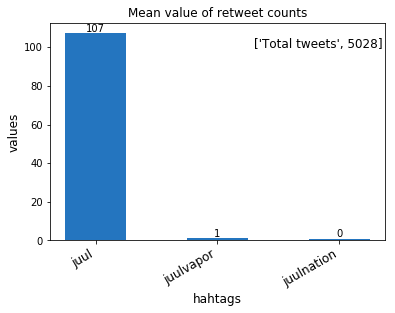

In [321]:
#getting the mean of wetweet counts
Juul_m = np.mean(df_Juul.retweetCount)
juulvapor_m = np.mean(df_juulvapor.retweetCount)
juulnation_m = np.mean(df_juulnation.retweetCount)
mean_labels = ['juul','juulvapor','juulnation']
mean_values = [Juul_m,juulvapor_m,juulnation_m]
graph(mean_labels,mean_values,title='Mean value of retweet counts',text=['Total tweets',len(df)])

In [255]:
len(df_Juul)

4842

In [256]:
df_Juul

,favourites_count,friendList,friendsCount,hashtags,imageurl,lang,parentID,retweetCount,retweeted,tweetCreatedAt,tweetId,tweetText,userCreatedAt,userDescription,userFollowersCount,userID,userLocation,userName
0,3464.0,None,341.0,"['juul', 'vaping', 'vape']",http://pbs.twimg.com/profile_images/8376943907...,en,None,2.0,0.0,2018-04-16 02:07:38,9.857012e+17,JUUL? Vaping? Do you know the effects? To lear...,2017-03-03 15:59:42,School Social Worker for Wauconda High School,156.0,8.376940e+17,NaN,Becky Feryance\r
1,14530.0,None,3180.0,"['JUUL', 'Affiliate', 'TheRaccPack', 'TUGFAM',...",http://pbs.twimg.com/profile_images/8196746793...,en,None,2.0,0.0,2017-11-28 00:50:28,9.353099e+17,I have taken the first step @JUULvapor what sa...,2011-11-20 02:46:25,I'm 21 Years Old // I'm A Gamer // Video Games...,1206.0,4.167390e+08,"McAllen, TX",🎄 Rudy 🎁 [Racc]\r
2,5505.0,None,258.0,"['thesemybutches', 'juul']",http://pbs.twimg.com/profile_images/1049398625...,en,None,1.0,0.0,2018-02-09 17:16:25,9.620123e+17,"Happy birthday Ashley, hope it’s 10/10!! Much ...",2012-09-18 23:58:32,hpu | alpha chi,536.0,8.321382e+08,NaN,katie\r
3,10786.0,None,415.0,"['juul', 'rickyandnala']",http://pbs.twimg.com/profile_images/1017178175...,en,None,2.0,0.0,2018-02-01 05:09:04,9.589302e+17,Happy Birthday Julia!! Have an awesome day!! L...,2014-01-29 12:18:40,~We are here to laugh at the odds and live our...,433.0,2.317056e+09,New York,Julia Macoretta\r
4,43.0,None,279.0,"['vape', 'ecig', 'juul']",http://pbs.twimg.com/profile_images/8132421148...,en,None,3.0,0.0,2017-05-15 23:21:38,8.642595e+17,Juul Mango And Fruit Medley Pods back in *Stoc...,2016-06-23 16:11:52,"227 1 St. Ave, New York, NY 10003 📞(917)474-10...",344.0,7.460129e+17,"New York, NY",E Smoke Shop\r
5,7117.0,None,663.0,"['tobacco', 'juul', 'dip', 'cigs']",http://pbs.twimg.com/profile_images/1017405051...,en,None,1.0,0.0,2018-01-16 17:32:24,9.533190e+17,HAPPY 18th B-Day Devan Sierra!!! It’s YOUR day...,2013-01-07 03:58:14,k-state cheerleader | ZTA,742.0,1.067382e+09,"Emporia, KS",Reagan\r
6,2678.0,None,383.0,"['juul', 'gale', 'smith']",http://pbs.twimg.com/profile_images/1049362533...,en,None,1.0,0.0,2018-03-16 19:42:00,9.747325e+17,happy bday to my sharpie ⚡️💘 you are one of th...,2013-01-26 02:19:55,NaN,516.0,1.120742e+09,NaN,Olivia\r
7,4237.0,None,413.0,['juul'],http://pbs.twimg.com/profile_images/1027677336...,en,None,0.0,0.0,2017-10-04 15:19:06,9.155972e+17,@Delaneycochran1 Del I love you thanks for eve...,2014-08-01 03:18:18,St. Eds 👻 drewturchyn gram andrewturchyn,653.0,2.730414e+09,"Cleveland, OH",andrew turchyn\r
8,7901.0,None,353.0,"['juul', 'legal', 'skorams']",http://pbs.twimg.com/profile_images/1033123785...,en,None,3.0,0.0,2017-08-07 13:08:31,8.945458e+17,happy 18th to my bestest friend!! plz don't le...,2013-08-11 22:20:27,keep ya heart | Howard U,445.0,1.663552e+09,DC + RVA,delani.\r
9,5969.0,None,424.0,['juul'],http://pbs.twimg.com/profile_images/1020491049...,en,None,2.0,0.0,2017-07-18 04:10:14,8.871626e+17,happy birthday to my bestie doood!!!!!! i frea...,2014-03-13 12:17:01,Chattanooga,553.0,2.407397e+09,NaN,ČČ\r


In [248]:
%%time
import datetime as dt
df_Juul = df_Juul.sort_values(by=['tweetCreatedAt'])

Wall time: 20 ms


In [249]:
df_Juul.dropna(inplace=True)

In [269]:
df_Juul.head()

,favourites_count,friendList,friendsCount,hashtags,imageurl,lang,parentID,retweetCount,retweeted,tweetCreatedAt,tweetId,tweetText,userCreatedAt,userDescription,userFollowersCount,userID,userLocation,userName
0,3464.0,None,341.0,"['juul', 'vaping', 'vape']",http://pbs.twimg.com/profile_images/8376943907...,en,None,2.0,0.0,2018-04-16 02:07:38,9.857012e+17,JUUL? Vaping? Do you know the effects? To lear...,2017-03-03 15:59:42,School Social Worker for Wauconda High School,156.0,8.376940e+17,NaN,Becky Feryance\r
1,14530.0,None,3180.0,"['JUUL', 'Affiliate', 'TheRaccPack', 'TUGFAM',...",http://pbs.twimg.com/profile_images/8196746793...,en,None,2.0,0.0,2017-11-28 00:50:28,9.353099e+17,I have taken the first step @JUULvapor what sa...,2011-11-20 02:46:25,I'm 21 Years Old // I'm A Gamer // Video Games...,1206.0,4.167390e+08,"McAllen, TX",🎄 Rudy 🎁 [Racc]\r
2,5505.0,None,258.0,"['thesemybutches', 'juul']",http://pbs.twimg.com/profile_images/1049398625...,en,None,1.0,0.0,2018-02-09 17:16:25,9.620123e+17,"Happy birthday Ashley, hope it’s 10/10!! Much ...",2012-09-18 23:58:32,hpu | alpha chi,536.0,8.321382e+08,NaN,katie\r
3,10786.0,None,415.0,"['juul', 'rickyandnala']",http://pbs.twimg.com/profile_images/1017178175...,en,None,2.0,0.0,2018-02-01 05:09:04,9.589302e+17,Happy Birthday Julia!! Have an awesome day!! L...,2014-01-29 12:18:40,~We are here to laugh at the odds and live our...,433.0,2.317056e+09,New York,Julia Macoretta\r
4,43.0,None,279.0,"['vape', 'ecig', 'juul']",http://pbs.twimg.com/profile_images/8132421148...,en,None,3.0,0.0,2017-05-15 23:21:38,8.642595e+17,Juul Mango And Fruit Medley Pods back in *Stoc...,2016-06-23 16:11:52,"227 1 St. Ave, New York, NY 10003 📞(917)474-10...",344.0,7.460129e+17,"New York, NY",E Smoke Shop\r


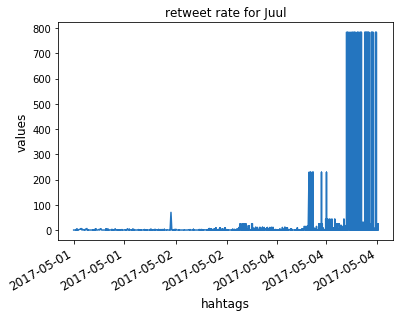

In [289]:
df_Juul = df_Juul.sort_values(by=['tweetCreatedAt'])
xvalues = [dt.datetime.strptime(d,'%Y-%m-%d %H:%M:%S').date() for d in df_Juul.tweetCreatedAt]
yvalues =  [i for i in df_Juul.retweetCount]
graph(xvalues,yvalues,title='retweet rate for Juul',typeG='Line')

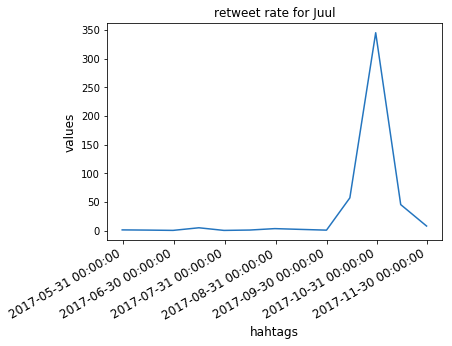

In [309]:
# getting mean per month
df_Juul['tweetCreatedAt'] = pd.to_datetime(df_Juul['tweetCreatedAt'])
df_Juul_retweets = df_Juul.set_index('tweetCreatedAt').groupby(pd.Grouper(freq='M')).mean()
xvalues = [i for i in df_Juul_retweets.index]
yvalues = [i for i in df_Juul_retweets.retweetCount]
graph(xvalues,yvalues,typeG='Line',title='retweet rate for Juul')

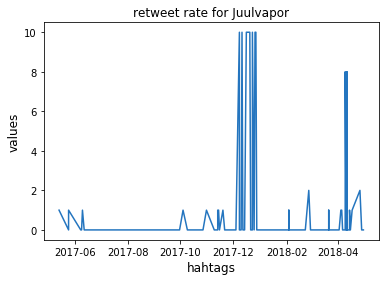

In [89]:
xvalues = [dt.datetime.strptime(d,'%Y-%m-%d %H:%M:%S').date() for d in df_juulvapor.tweetCreatedAt[:10000]]
yvalues = [i for i in df_juulvapor.retweetCount[:10000]]
graph(xvalues,yvalues,title='retweet rate for Juulvapor',typeG='Line')

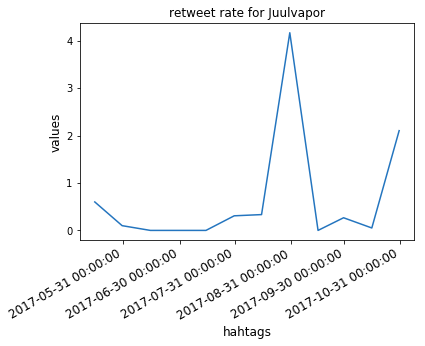

In [307]:
# getting mean per month
df_juulvapor['tweetCreatedAt'] = pd.to_datetime(df_juulvapor['tweetCreatedAt'])
df_juulvapor_retweets = df_juulvapor.set_index('tweetCreatedAt').groupby(pd.Grouper(freq='M')).mean()
xvalues = [i for i in df_juulvapor_retweets.index]
yvalues = [i for i in df_juulvapor_retweets.retweetCount]
graph(xvalues,yvalues,typeG='Line',title='retweet rate for Juulvapor')

In [297]:
df_Juul_retweets.dropna(inplace=True)

In [ ]:
xvalues = [d for d in dt.datetime.strptime(d,'%Y-%m-%d %H:%M:%S')]
yvalues = [i for i in df_Juul.retweetCount]
graph(xvalues,yvalues,title='retweet rate for Juul',typeG='Line')

In [ ]:
df_juulvapor = df_juulvapor.sort_values(by=['tweetCreatedAt'])
df_juulvapor_means = df_juulvapor.set_index('tweetCreatedAt').groupby(pd.Grouper(freq='M')).mean()
df_juulvapor_means

### history of the users timeline

In [94]:
import TweepyScraping
import tweepy
pre = TweepyScraping.Twitter()
api = pre.api

In [393]:
status1 = api.statuses_lookup([953330878939267073],tweet_mode='extended')
status1[0].user.name

'Tobacco'

In [234]:
# 749448380263182336,887162571844980736,1632653196
status_obj = api.user_timeline(screen_name = 'AboutTobacco')    #id = '749448380263182336'

In [204]:
def getHashtags(tweetObj, extended=False):
    if extended == True:
        if 'retweeted_status' in tweetObj._json.keys():
            if len(tweetObj.retweeted_status.entities['hashtags']) != 0:
                hashtags = [i['text'] for i in tweetObj.retweeted_status.entities['hashtags']]
            else:
                hashtags = None
        else:
            hashtags = self.getHashtags(tweetObj,extended=False)
    else:
        if len(tweetObj.entities['hashtags']) != 0:
            hashtags = [j['text'] for j in tweetObj.entities['hashtags']]
        else:
            hashtags = "None"
    return hashtags

In [358]:
# return the user timeline
def userTimline(userId,since_id= '01-01-2017'):
    user_tweets = pd.DataFrame()
    for status in tweepy.Cursor(api.user_timeline,user_id=userId ,since_id=since_id,tweet_mode='extended').items(): #screen_name = 'AboutTobacco'
        if 'retweeted_status' in status._json.keys():
            text = status.retweeted_status.full_text.replace("\n", " ")
            hashtags = getHashtags(status,extended=True)        # for retweeted status
        else:
            text = status.full_text.replace("\n", " ")
            hashtags = getHashtags(status)
        data = pd.DataFrame.from_records([{
            'tweetid' : status.id,
            'tweetText' : text,
            'retweetCount' : status.retweet_count,
            'created_at' : status.created_at,
            'hashtags' : hashtags
        }],index=[0])
        user_tweets = user_tweets.append(data)
    return(user_tweets)

In [386]:
from tqdm import tqdm

In [387]:
# get the user timeline
for userID in tqdm(df.userID[5:10]):
    userId = df.userID.iloc[2]
    user_timeline = userTimline(userId)
    a = [hashtag for hashtag in user_timeline.hashtags if hashtag in [Juul,'juulvapor','juulnation','vape']]
    if (len(a) >0):
        print(userId)

100%|████████████████████████████████████████████| 5/5 [07:53<00:00, 94.55s/it]


In [402]:
user_mentions = pd.DataFrame()
for tweets in tweepy.Cursor(api.search, q="from:1120742346 #Juul",since_id = '01-01-2013' ,lang="en").items():
    if 'retweeted_status' in status._json.keys():
            text = status.retweeted_status.full_text.replace("\n", " ")
            hashtags = getHashtags(status,extended=True)        # for retweeted status
    else:
        text = status.full_text.replace("\n", " ")
        hashtags = getHashtags(status)
    data = pd.DataFrame.from_records([{
        'tweetid' : status.id,
        'tweetText' : text,
        'retweetCount' : status.retweet_count,
        'created_at' : status.created_at,
        'hashtags' : hashtags
    }],index=[0])
    user_mentions = user_tweets.append(data)
user_mentions

""


In [376]:
user_timeline = user_timeline.sort_values(by=['created_at'])

In [377]:
retweets = user_timeline.set_index('created_at').groupby(pd.Grouper(freq='M')).mean()

In [378]:
retweets.dropna(inplace=True)

In [379]:
retweets

,retweetCount,tweetid
created_at,,
2013-01-31,10.981818,2.963647e+17
2013-02-28,27.487500,3.011109e+17
2013-03-31,28.182796,3.121728e+17
2013-04-30,0.250000,3.251600e+17
2013-05-31,0.183333,3.352465e+17
2013-06-30,31.398990,3.462233e+17
2013-07-31,26.113208,3.556076e+17
2013-08-31,20.807692,3.690949e+17
2013-09-30,0.301205,3.781228e+17


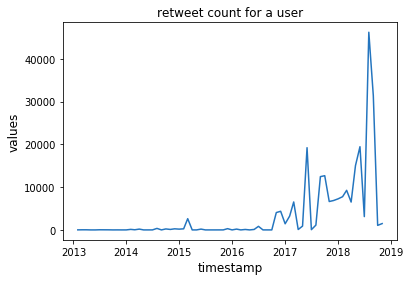

In [381]:
xvalues = [i for i in retweets.index]
yvalues = [i for i in retweets.retweetCount]
graph(xvalues,yvalues,xlabel='timestamp',ylabel='values',typeG='Line',title='retweet count for a user')

In [368]:
len(xvalues)

67

In [403]:
df = pd.read_csv("../input/hexagon.csv",lineterminator='\n',index_col=0) #issue 2 resolved, read as object

In [413]:
len(df.friendList.iloc[4])

4232

In [6]:
len(df2.userID)

220

## Removing the text columns and user and tweetID

In [ ]:
preDf = df[['favourites_count','friendsCount','hashtags','retweetCount','userFollowersCount','tweetId']]

In [ ]:
preDf

In [ ]:
user = api.statuses_lookup(df_test[0:100].tweetId.tolist(),tweet_mode='extended')

In [ ]:
count =0 
for i in range(len(user)):
    if 'retweeted_status' in user[i]._json.keys():
        print(user[i].retweeted_status.entities)
        count += 1
print("count = ", count)